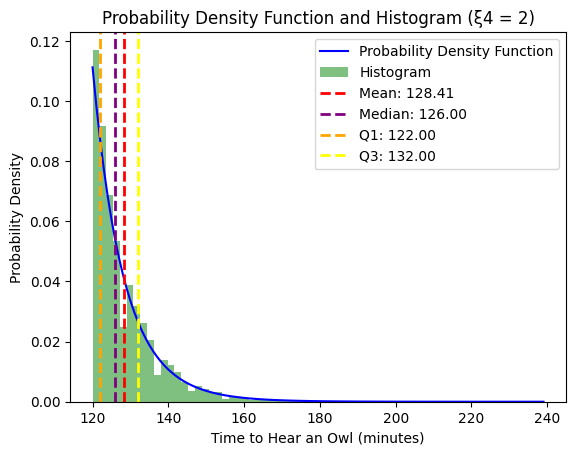

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given parameters
ξ4 = 2
ξ5 = 0.86
ξ6 = 7
ξ7 = 0.13
ξ8 = 9

# Time range (in minutes)
time_range = np.arange(2 * 60, 4 * 60, 1)  # 1 minute intervals

# Probability density function
pdf = ξ5 * np.exp(-ξ6 * np.sqrt(time_range)) + ξ7 * np.exp(-ξ8 * (time_range**(1/3)))

# Normalize PDF
pdf = pdf / sum(pdf)

# Plotting PDF
fig, ax = plt.subplots()
ax.plot(time_range, pdf, label='Probability Density Function', color='blue')

# Plotting Histogram
samples = np.random.choice(time_range, size=10000, p=pdf)
ax.hist(samples, bins=50, density=True, alpha=0.5, color='green', label='Histogram')

# Mean, Variance, and Quartiles
mean_val = np.mean(samples)
variance_val = np.var(samples)
q1, median, q3 = np.percentile(samples, [25, 50, 75])

# Display mean, variance, and quartiles in the plot
ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
ax.axvline(median, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
ax.axvline(q1, color='orange', linestyle='dashed', linewidth=2, label=f'Q1: {q1:.2f}')
ax.axvline(q3, color='yellow', linestyle='dashed', linewidth=2, label=f'Q3: {q3:.2f}')

# Display the plot
plt.title(f"Probability Density Function and Histogram (ξ4 = {ξ4})")
plt.xlabel("Time to Hear an Owl (minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()